In [ ]:
import pandas as pd

**TIME FORMAT**

In [ ]:
# INCORRECT FORMAT
# converting STR -> DATE & TIME ==> 'pd.to_datetime' 
# ONLY THIS TYPE OF STRING FORMAT IS TAKEN.
demo_dt = '15/03/2022 05:50:40' 
print(demo_dt)
print(type(demo_dt))

print('\n')

dt = pd.to_datetime(demo_dt)
print(dt)
print(type(dt))

15/03/2022 05:50:40
<class 'str'>


2022-03-15 05:50:40
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [ ]:
# INCORRECT FORMAT
# THIS FORMAT can't TAKEN.
demo_dt1 = '15-03-2022 05/50/40' 
dt1 = pd.to_datetime(demo_dt1)
print(dt1)
print(type(dt1))

In [ ]:
# FORMAT CODES IN DATETIME/TIMESTAMP LIBRARY OF PANDAS
# %Y - year
# %m - month 
# %d - date
# %H - hours
# %M - minutes
# %S - seconds 

# DEFAULT = Year - Mon - Dt , hrs - min - sec

In [ ]:
# CONVERTING TO CORRECT DEFAULT FORMAT by specifying FORMAT

demo_dt1 = '15-03-2022 05/50/40' 
dt2 = pd.to_datetime(demo_dt1 , format = "%d-%m-%Y %H/%M/%S")
print(dt2)
print(type(dt2))

2022-03-15 05:50:40
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [ ]:
# CONVERTING TO CORRECT DEFAULT FORMAT by specifying FORMAT
# we've to give EXACT SPECIFIED FORMAT (includes spaces etc..) to the FORMAT WHILE CONVERTING
demo_dt1 = " 15-03'2022; 05&50$40 " 
dt3 = pd.to_datetime(demo_dt1 , format = " %d-%m'%Y; %H&%M$%S ")
print(dt3)
print(type(dt3))

2022-03-15 05:50:40
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [ ]:
# DEFAULT CURRENT DATE AND TIME
# it'll give the CURRENT DATE AND TIME at the SERVERS LOCATION (not at our own location)
from datetime import datetime 
print(datetime.now())

2022-03-18 04:59:36.527978


**FORECASTING WITH TIME SERIES ANALYSIS**

In [ ]:
# READING HTML FORMAT

df = pd.read_html('/content/DailyWiseMarketArrivals.html')
df

[                                      0
 0  DATE WISE MARKET ARRIVALS AND PRICES,
           0                                                  1        2  \
 0    Crop :              Select  Garlic  Onion  Potato  Tomato   Year :   
 1  Market :  All  ABOHAR(PB)  AGRA(UP)  AHMEDABAD(GUJ)  AHM...  Month :   
 2       NaN                                                NaN      NaN   
 
                                                    3  
 0  All  2022  2021  2020  2019  2018  2017  2016 ...  
 1  All  January  February  March  April  May  Jun...  
 2                                                NaN  ,
                                                  0
 0  DATE WISE MARKET ARRIVALS AND PRICES FOR POTATO,
              Date  Market  Arrival(q) Price Minimum (Rs/q)  \
 0     01/Jan/2005  MUMBAI       13200                  250   
 1     03/Jan/2005  MUMBAI       11700                  250   
 2     05/Jan/2005  MUMBAI       12100                  250   
 3     06/Jan/2005  MUMBAI   

In [ ]:
# DEFAULT HTML READING FORMAT to LIST

print(type(df))
print(len(df))

<class 'list'>
4


In [ ]:
# FOR HTML -> PANDAS DATAFRAME :

df1 = pd.read_html("/content/DailyWiseMarketArrivals.html")[-1]
df1

,Date,Market,Arrival(q),Price Minimum (Rs/q),Price Maximum (Rs/q),Modal Price (Rs/q)
0,01/Jan/2005,MUMBAI,13200,250,650,450
1,03/Jan/2005,MUMBAI,11700,250,650,450
2,05/Jan/2005,MUMBAI,12100,250,650,450
3,06/Jan/2005,MUMBAI,9130,200,650,425
4,07/Jan/2005,MUMBAI,9350,200,700,450
...,...,...,...,...,...,...
4317,09/Mar/2022,MUMBAI,8087,1000,1500,1250
4318,10/Mar/2022,MUMBAI,7534,1000,1500,1250
4319,11/Mar/2022,MUMBAI,11752,900,1500,1200
4320,12/Mar/2022,MUMBAI,13245,900,1500,1200


In [ ]:
print(df1.info())

In [ ]:
# THERE IS A NULL VALUE IN DATE COLUMN
print(df1.isnull().sum())

Date                    1
Market                  0
Arrival(q)              0
Price Minimum (Rs/q)    0
Price Maximum (Rs/q)    0
Modal Price (Rs/q)      0
dtype: int64


In [ ]:
# DROPS ALL ROWS where there is a NULL VALUE

df1 = df1.dropna() 
# df1.fillna(0)
print(df1.info())
print('\n')
print(df1.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4321 entries, 0 to 4320
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Date                  4321 non-null   object
 1   Market                4321 non-null   object
 2   Arrival(q)            4321 non-null   int64 
 3   Price Minimum (Rs/q)  4321 non-null   object
 4   Price Maximum (Rs/q)  4321 non-null   object
 5   Modal Price (Rs/q)    4321 non-null   object
dtypes: int64(1), object(5)
memory usage: 236.3+ KB
None


Date                    0
Market                  0
Arrival(q)              0
Price Minimum (Rs/q)    0
Price Maximum (Rs/q)    0
Modal Price (Rs/q)      0
dtype: int64


In [ ]:
df1.tail()

In [ ]:
# CREATING A NEW FILE vth REQ FORMAT(crop data.csv) and filling it wih REQ DATAFRAME

df1.to_csv('crop data.csv')

In [ ]:
# RENAMING COLUMNS
# DATE -> ds , MODAL PRICE -> y
df1.rename(columns = {'Modal Price (Rs/q)':'y','Date':'ds'},inplace=True)

# by default it creates a duplicate dataframe 
# to not create any duplicate dataframe we give inplace=True
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4321 entries, 0 to 4320
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ds                    4321 non-null   object
 1   Market                4321 non-null   object
 2   Arrival(q)            4321 non-null   int64 
 3   Price Minimum (Rs/q)  4321 non-null   object
 4   Price Maximum (Rs/q)  4321 non-null   object
 5   y                     4321 non-null   object
dtypes: int64(1), object(5)
memory usage: 236.3+ KB
None


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
# CREATING A DATAFRAME WITH ONLY REQ COLUMNS OF DATA

df_new = df1[['ds' , 'y']]
df_new

,ds,y
0,01/Jan/2005,450
1,03/Jan/2005,450
2,05/Jan/2005,450
3,06/Jan/2005,425
4,07/Jan/2005,450
...,...,...
4316,08/Mar/2022,1300
4317,09/Mar/2022,1250
4318,10/Mar/2022,1250
4319,11/Mar/2022,1200


In [ ]:
print(df_new.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4321 entries, 0 to 4320
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ds      4321 non-null   object
 1   y       4321 non-null   object
dtypes: object(2)
memory usage: 101.3+ KB
None


In [ ]:
# convert object to datetime64[ns] datatype
# date (object) -> datetime format
df_new['ds'] = pd.to_datetime(df_new['ds']) 

# type casting from object to int datatype
df_new['y'] = df_new['y'].astype(int)
df_new

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,ds,y
0,2005-01-01,450
1,2005-01-03,450
2,2005-01-05,450
3,2005-01-06,425
4,2005-01-07,450
...,...,...
4316,2022-03-08,1300
4317,2022-03-09,1250
4318,2022-03-10,1250
4319,2022-03-11,1200


In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4321 entries, 0 to 4320
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      4321 non-null   datetime64[ns]
 1   y       4321 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 101.3 KB


**DATA VISUALISATION**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

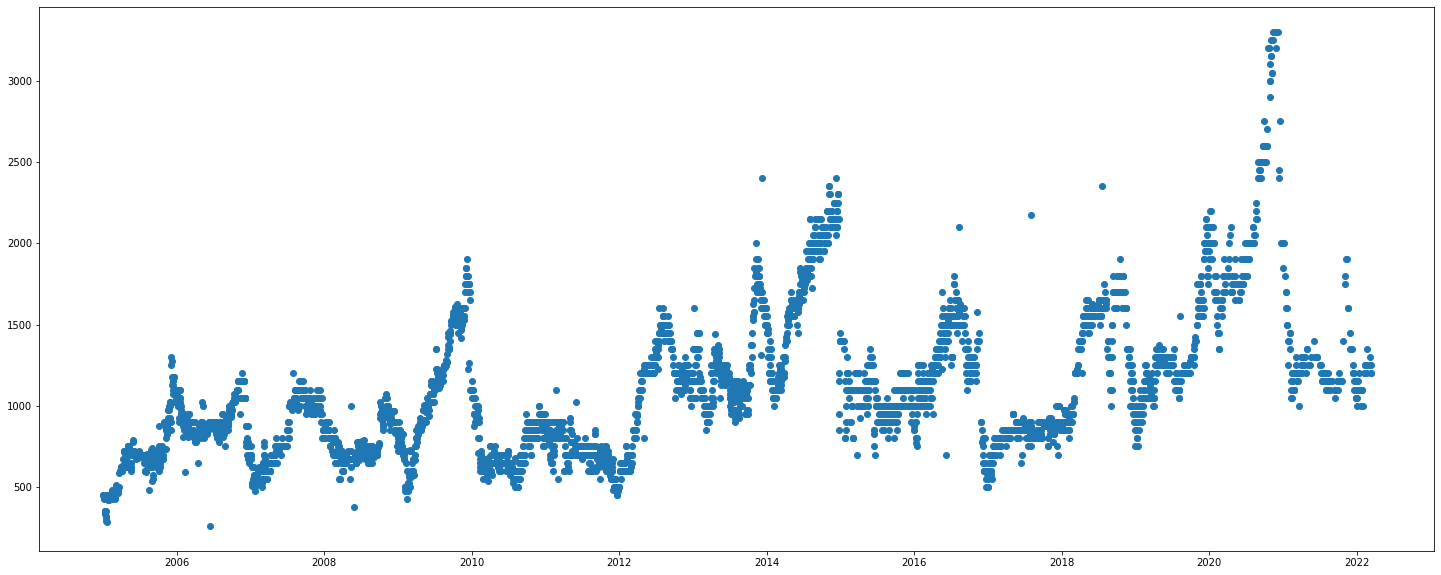

In [ ]:

plt.figure(figsize=(25,10))
plt.scatter(df_new['ds'] , df_new['y'])
plt.show()

In [26]:
# FOR PLOTTING WITHIN THE LIMITS , by CHANGING ONLY COLUMN
df_new['y'] = np.where(df_new['y']>2500, np.nan, df_new['y'])
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4321 entries, 0 to 4320
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      4321 non-null   datetime64[ns]
 1   y       4293 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 101.3 KB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


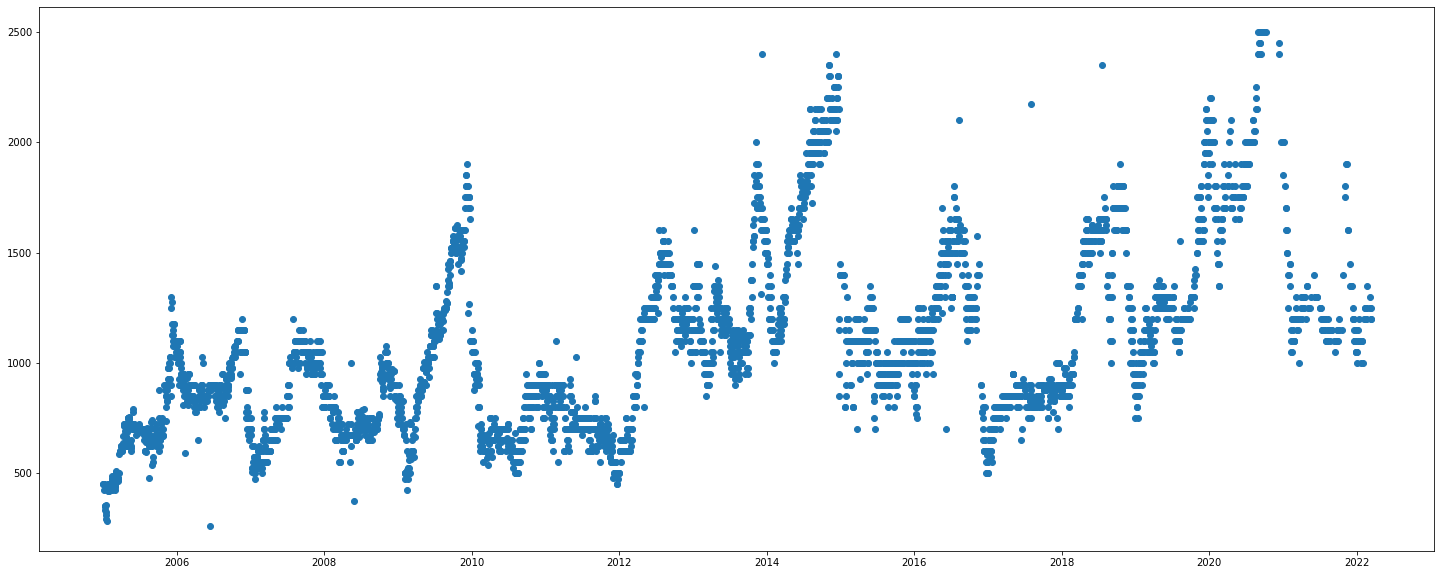

In [27]:

plt.figure(figsize=(25,10))
plt.scatter(df_new['ds'] , df_new['y'])
plt.show()

**FORECASTING using FBPROPHET**

In [ ]:
# FORECASTING using FBPROPHET
# INPUTS must be DATE-TIME and PARAMETER (ie., PRICE , POPULATION ..)

In [28]:
import fbprophet

In [29]:
# CALLING

fc_df = fbprophet.Prophet()
fc_df

In [30]:
# FITTING THE MODEL (time in days (ds) , price(y))

fc_df.fit(df_new)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [31]:
# GIVING REQ FORECASTING PERIOD (ex = 500DAYS)

forecast = fc_df.make_future_dataframe(periods=500,freq = 'D')

In [32]:
# PREDICTING FORECAST

forecast = fc_df.predict(forecast)

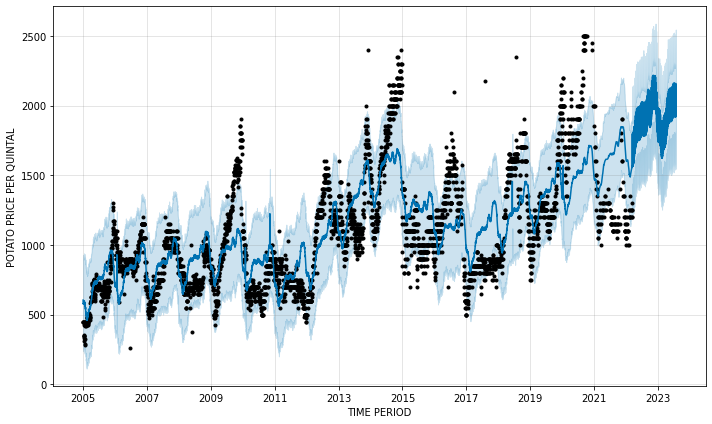

<Figure size 1800x720 with 0 Axes>

In [37]:
fc_df.plot(forecast , xlabel = 'TIME PERIOD' , ylabel = 'POTATO PRICE PER QUINTAL')
plt.figure(figsize = (25,10))
plt.show()